In [1]:
import warnings
import sys
warnings.filterwarnings('ignore')
sys.path.append('../')

import pandas as pd 
import seaborn as sns 
import numpy as np
import copy
from sklearn.manifold import TSNE

from rdkit import Chem

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import descriptors.preprocessing as pp
import descriptors.dft_featurisation as ft


# Set matplotlib style 
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

matplotlib.rcParams['axes.unicode_minus'] = False
sns.set_style("white")
%matplotlib inline 

In [2]:
# Load NiCOlit dataset
df = pd.read_csv("data/NiCOlit.csv", sep = ',')
df2 = pp.preprocess(df)

In [21]:
# DFT Featurize NiCOlit dataset
X, y, DOIs, coupling_partners, origins, sub, ligs = ft.process_dataframe_dft(copy.copy(df2), data_path="data/utils/")
display_df =  pd.DataFrame(zip(y, coupling_partners, origins, DOIs), 
                           columns =['Yields', 'Coupling Partners', 'Origin', 'DOIs'])

# Rename Coupling Partner Classes
dois = np.unique(DOIs)

# Perform TSNE of the NiCOlit featurized and get two frist components
X_embedded = TSNE(n_components=2, random_state=11).fit_transform(X)
tsne1 = [i[0] for i in X_embedded]
tsne2 = [i[1] for i in X_embedded]

# Choose a DOI, Coupling Partner, Substrate
num_doi = 10     # DOI choice
num_coupl = 1  # Boronic Partner
num_sub = 5     # Substrate 

coupling_partner = np.unique(coupling_partners)
substrates = df2["substrate"].unique()

# Perform data splitting random, by DOI, by coupling partner and by substrate
nums = np.random.choice([0, 1], size=len(X_embedded), p=[.3, .7])
nums[0] = 1
random_split = ["Test Set" if i == 0 else "Train Set" for i in nums]
doi_split = ["Test Set" if i == dois[num_doi] else "Train Set" for i in DOIs]
coupl_split = ["Test Set" if i == coupling_partner[num_coupl] else "Train Set" for i in coupling_partners]
substrate_split = ["Test Set" if i == 'CC(C)(C)C(=O)Oc1ccc2ccccc2c1' else "Train Set" for i in df2["substrate"]]

# Make data_frame for future plot
tsne_df = pd.DataFrame(zip(tsne1, tsne2, DOIs, coupling_partners, origins, y, 
                           random_split, doi_split, coupl_split, substrate_split), 
                       columns =['TSNE 1', 'TSNE 2', 'DOIs', 'Coupling Partners', 'Origin', 
                                 'Yields', 'Random Split', 'DOI Split', 
                                 'Coupling Reagent Split', 'Subtrate Split'])

In [41]:
# restricted
df_rest = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
# full
df_full = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')

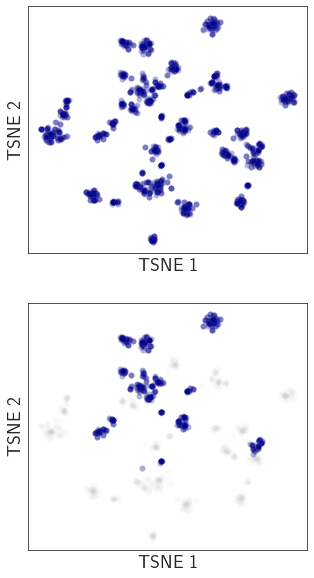

In [53]:
# Figures TSNE-datasets
# Restricted to one type of Coupling Partner :
tsne_df["IsBoron"] = [1 if cp=='B' else 0 for cp in tsne_df["Coupling Partners"]]

fig, ax = plt.subplots(2, 1, figsize=(5, 10))

# plot all data point and density
sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                alpha=0.3, 
                color="DarkBlue", linewidth=0.1, ax=ax[0])

# plot Boron data point and density
sns.scatterplot(data=Boron_df, x="TSNE 1", y="TSNE 2", 
                alpha=0.3, 
                color="DarkBlue", linewidth=0.1, ax=ax[1])

sns.scatterplot(data=Not_Boron_df, x="TSNE 1", y="TSNE 2", 
                alpha=0.01, 
                color="grey", linewidth=0.002, ax=ax[1])

#h.set_axis_labels('Experimental yields', 'Predicted yields')
#h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
#h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])

# plot performances restricted


ax[1].set_xticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[0].set_yticks([])

fig.savefig("images/data_sets_fig4.svg", dpi=300, bbox_inches="tight")
plt.show()